In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler as rs
import os

In [3]:
class Data :

    def __init__(self) :
        self.dataframe = pd.DataFrame([])

    #Read data from CSV dataset(s)
    def read(self, filename : str) :
        """Reads values/data from CSV files into dataframe"""
        if os.path.exists(filename) :
            self.dataframe = pd.read_csv(filename)
            print(f"Data successfully read from {filename}.")
        else :
            print(f"Error: The file {filename} does not exist.")

    #Check for null values in the dataset(s)
    def check_null_values(self) :
        """Checks for null values in the dataframe."""
        print("Null Values Before Cleaning:")
        print(self.dataframe.isnull().sum())

    #Cleaning the dataset :
    def clean_dataset(self) :
        """Cleans the dataset by removing null values"""
        if self.dataframe is not None :
            original_shape = self.dataframe.shape #store the original shape of the DataFrame
            self.dataframe = self.dataframe.dropna() #drop all rows with null values; dropna() is a Pandas method that, by default, drops all rows that contain at least one null value.
            cleaned_shape = self.dataframe.shape #store the cleaned shape of DataFrame
            print(f"Dataset cleaned. Original shape: {original_shape}, Cleaned shape: {cleaned_shape}.")
        else:
            print("Error: No data to clean. Please read a dataset first.")

    # Normalize the data
    def normalize(self):
        """Normalizes numeric columns in the dataframe"""
        # Select columns to scale
        columns_to_scale = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

        # Ensure all specified columns are in the DataFrame
        columns_to_scale = [col for col in columns_to_scale if col in self.dataframe.columns]

        if columns_to_scale:
            # Select the data to scale
            data_to_scale = self.dataframe[columns_to_scale]

            # Initialize the RobustScaler
            scaler = rs()

            # Fit and transform the data
            scaled_data = scaler.fit_transform(data_to_scale)

            # Update the DataFrame with the scaled data
            self.dataframe[columns_to_scale] = scaled_data

            print("Data successfully normalized:")
            print(self.dataframe.head())
        else:
            print("Error: No columns to normalize. Please ensure the dataframe contains the necessary columns.")


    # Visualize the data
    def visualize(self):
        """Plots graph for open stock values vs. date."""
        if 'Date' in self.dataframe.columns and 'Open' in self.dataframe.columns:
            # Ensure 'Date' column is in datetime format
            self.dataframe['Date'] = pd.to_datetime(self.dataframe['Date'])

            # Ensure 'Open' column is in numeric format
            self.dataframe['Open'] = pd.to_numeric(self.dataframe['Open'], errors='coerce')

            # Drop any rows where 'Date' or 'Open' is NaN
            self.dataframe = self.dataframe.dropna(subset=['Date', 'Open'])

            plt.figure(figsize=(14, 7))
            plt.plot(self.dataframe['Date'], self.dataframe['Open'], label='Open')
            plt.title('Open Stock Values vs. Date')
            plt.xlabel('Date')
            plt.ylabel('Open Stock Value')
            plt.legend()
            plt.show()
        else:
            print("Dataframe does not contain 'Date' and 'Open' columns.")


    def print_head(self):
        """Prints the head of the dataframe."""
        print("Head of the DataFrame:")
        print(self.dataframe.head())

    def print_description(self):
        """Prints the description of the dataframe."""
        print("\nDescription of the DataFrame:")
        print(self.dataframe.describe())



In [4]:
data = Data()

In [6]:
data.read('sample_data/BTC-USD.csv')

Data successfully read from sample_data/BTC-USD.csv.


In [7]:
data.print_head()
data.print_description()

Head of the DataFrame:
         Date         Open         High          Low        Close  \
0  2019-05-30  8661.760742  9008.314453  8221.273438  8319.472656   
1  2019-05-31  8320.286133  8586.659180  8172.550781  8574.501953   
2  2019-06-01  8573.839844  8625.600586  8481.578125  8564.016602   
3  2019-06-02  8565.473633  8809.303711  8561.235352  8742.958008   
4  2019-06-03  8741.747070  8743.500000  8204.185547  8208.995117   

     Adj Close       Volume  
0  8319.472656  29246528551  
1  8574.501953  25365190957  
2  8564.016602  22488303544  
3  8742.958008  20266216022  
4  8208.995117  22004511436  

Description of the DataFrame:
               Open          High           Low         Close     Adj Close  \
count   1828.000000   1828.000000   1828.000000   1828.000000   1828.000000   
mean   28967.982724  29623.862496  28269.238412  28998.036055  28998.036055   
std    17577.774917  18012.190039  17089.222440  17591.494893  17591.494893   
min     5002.578125   5331.833984  

In [8]:
data.check_null_values()

Null Values Before Cleaning:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [10]:
data.clean_dataset()

Dataset cleaned. Original shape: (1828, 7), Cleaned shape: (1828, 7).


In [11]:
data.normalize()

Data successfully normalized:
         Date      Open      High       Low     Close  Adj Close    Volume
0  2019-05-30 -0.590330 -0.579843 -0.608066 -0.601487  -0.601487  0.110264
1  2019-05-31 -0.601444 -0.593317 -0.609695 -0.593192  -0.593192 -0.094877
2  2019-06-01 -0.593191 -0.592073 -0.599367 -0.593533  -0.593533 -0.246929
3  2019-06-02 -0.593464 -0.586202 -0.596704 -0.587713  -0.587713 -0.364374
4  2019-06-03 -0.587726 -0.588305 -0.608637 -0.605080  -0.605080 -0.272499


In [12]:
data.check_null_values()

Null Values Before Cleaning:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [13]:
data.print_head()
data.print_description()

Head of the DataFrame:
         Date      Open      High       Low     Close  Adj Close    Volume
0  2019-05-30 -0.590330 -0.579843 -0.608066 -0.601487  -0.601487  0.110264
1  2019-05-31 -0.601444 -0.593317 -0.609695 -0.593192  -0.593192 -0.094877
2  2019-06-01 -0.593191 -0.592073 -0.599367 -0.593533  -0.593533 -0.246929
3  2019-06-02 -0.593464 -0.586202 -0.596704 -0.587713  -0.587713 -0.364374
4  2019-06-03 -0.587726 -0.588305 -0.608637 -0.605080  -0.605080 -0.272499

Description of the DataFrame:
              Open         High           Low        Close    Adj Close  \
count  1828.000000  1828.000000  1.828000e+03  1828.000000  1828.000000   
mean      0.070619     0.078922  6.196055e-02     0.071085     0.071085   
std       0.572140     0.575576  5.711422e-01     0.572165     0.572165   
min      -0.709433    -0.697324 -7.455709e-01    -0.710403    -0.710403   
25%      -0.501935    -0.497967 -5.096949e-01    -0.501820    -0.501820   
50%       0.000000     0.000000 -6.079325e-17 

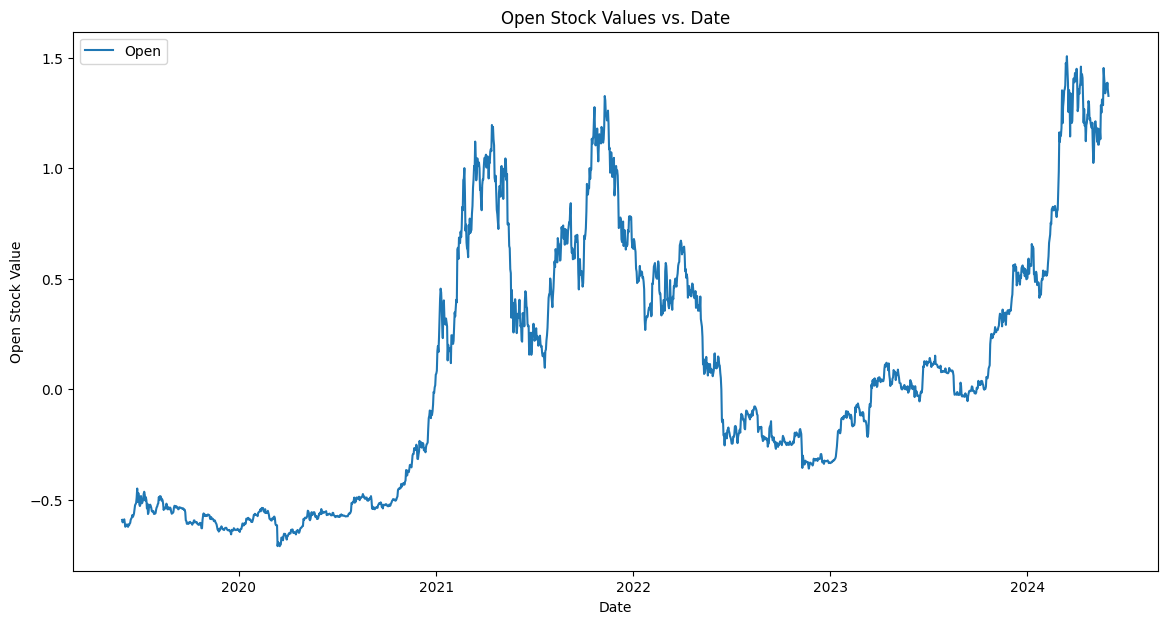

In [14]:
data.visualize()